Линейная модель:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Линейная модель
class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)  # инициализация весов
        self.bias = 0.0  # инициализация смещения

    def __call__(self, X):
        return np.dot(X, self.weights) + self.bias  # линейное предсказание


Линейная регрессия:

In [2]:
class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self(X)
            error = y - predictions
            gradient = -2 * np.dot(X.T, error) / len(y)  # градиент для MSE
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = ((y - predictions) ** 2).sum()
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        return self(X)


Линейный классификатор:

In [3]:
class LinearClassifier(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self(X)
            sigmoid = 1 / (1 + np.exp(-predictions))  # сигмоидная функция
            error = y - sigmoid
            gradient = -np.dot(X.T, error) / len(y)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))  # BCE
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return np.round(sigmoid)

    def predict_proba(self, X):
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return sigmoid


Линейная регрессия на данных

C:\Users\Eng_Basem\AppData\Local\Temp\ipykernel_20000\57810995.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
C:\Users\Eng_Basem\AppData\Local\Temp\ipykernel_20000\57810995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


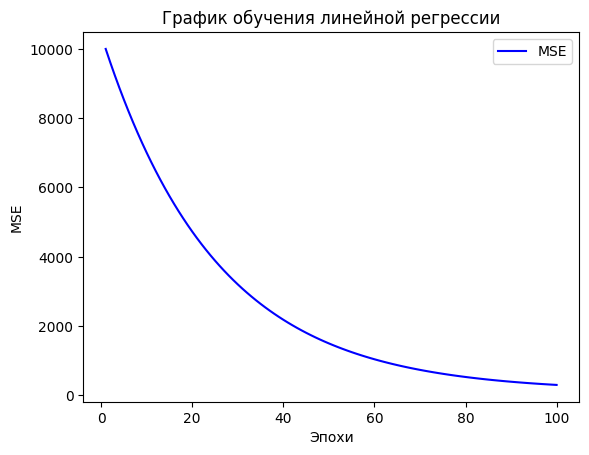

In [4]:
import pandas as pd

data = pd.read_csv('Student_Performance.csv')
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
Y = data['Performance Index']

# Преобразование категориального признака
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
X = X.to_numpy()

# Нормализация данных
mean = X.mean(axis=0)
std = X.std(axis=0)
normalized_X = (X - mean) / std
normalized_Y = (Y - Y.mean()) / Y.std()

# Обучение линейной регрессии
lr = LinearRegressor(num_features=normalized_X.shape[1])
history = lr.fit(normalized_X, normalized_Y)

# График обучения
epochs = range(1, len(history) + 1)
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения линейной регрессии')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.show()


Линейный классификатор на данных

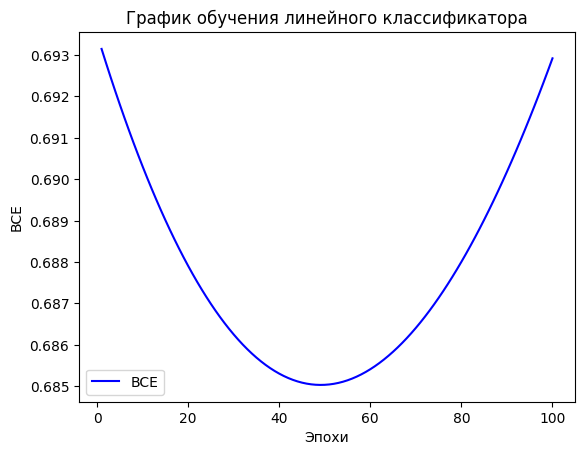

Accuracy: 0.494
ROC-AUC: 0.80
Precision: 0.95
Recall: 0.29
F1 Score: 0.45


In [5]:
data = pd.read_csv('german.csv', sep=';')
Y = data['Creditability']
X = data.drop(columns=['Creditability'])

# Нормализация данных
mean = X.mean(axis=0)
std = X.std(axis=0)
normalized_X = (X - mean) / std

# Обучение линейного классификатора
lc = LinearClassifier(num_features=normalized_X.shape[1])
history = lc.fit(normalized_X.to_numpy(), Y.to_numpy())

# График обучения
epochs = range(1, len(history) + 1)
plt.plot(epochs, history, 'b', label='BCE')
plt.title('График обучения линейного классификатора')
plt.xlabel('Эпохи')
plt.ylabel('BCE')
plt.legend()
plt.show()

# Предсказания и оценка модели
pred = lc.predict(normalized_X.to_numpy())
print('Accuracy:', (pred == Y).mean())

# ROC-AUC, precision, recall, F1
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

proba_pred = lc.predict_proba(normalized_X.to_numpy())
roc_auc = roc_auc_score(Y, proba_pred)
precision = precision_score(Y, pred)
recall = recall_score(Y, pred)
f1 = f1_score(Y, pred)

print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")